In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [7]:
df.columns=df.columns.str.lower()

In [10]:
df

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
df.isnull().sum()

tv           0
radio        0
newspaper    0
sales        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
from pandas_profiling import ProfileReport

In [15]:
profile=ProfileReport(df,explorative=True)

In [16]:
profile.to_file("eda_advertising.html")

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

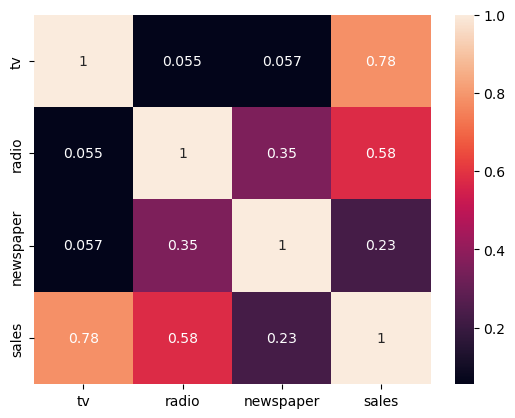

In [21]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='tv', ylabel='sales'>

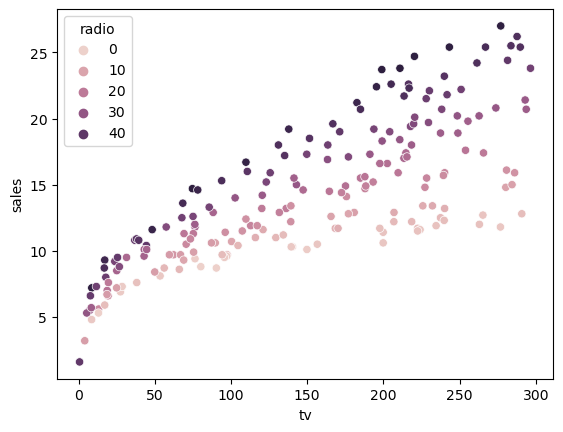

In [29]:
sns.scatterplot(df,x='tv',y='sales',hue='radio')

C:\Users\USER\AppData\Local\Temp\ipykernel_14252\1466740702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])


<Axes: xlabel='sales', ylabel='Density'>

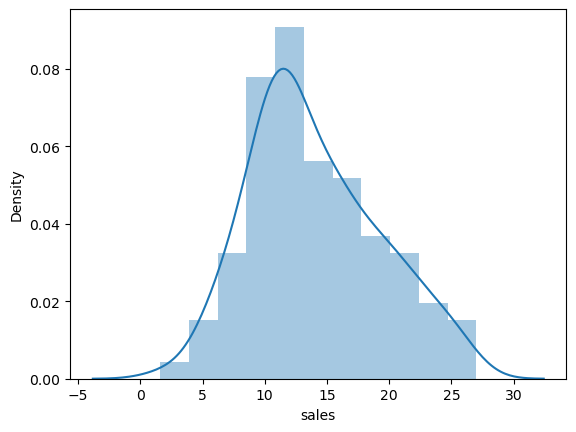

In [31]:
sns.distplot(df['sales'])

C:\Users\USER\AppData\Local\Temp\ipykernel_14252\3121227710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tv'])


<Axes: xlabel='tv', ylabel='Density'>

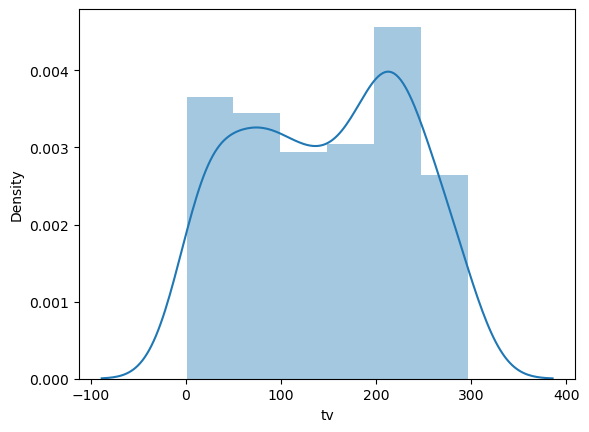

In [32]:
sns.distplot(df['tv'])

C:\Users\USER\AppData\Local\Temp\ipykernel_14252\1243865781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['radio'])


<Axes: xlabel='radio', ylabel='Density'>

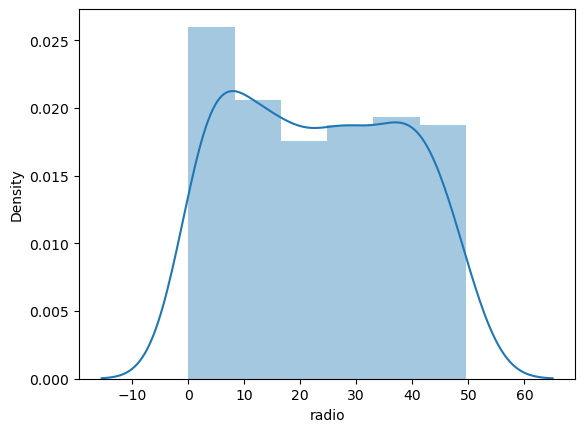

In [33]:
sns.distplot(df['radio'])

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xg
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [34]:
x=df.drop(['sales'],axis=1)
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
df.columns

Index(['tv', 'radio', 'newspaper', 'sales'], dtype='object')

In [40]:
stp1=ColumnTransformer(
transformers=[
    ('t1',StandardScaler(),['tv','radio','newspaper']),
],
    remainder='passthrough'
)

In [47]:
stp2=xg.XGBRegressor(
n_estimators=300,
learning_rate=0.1,
max_depth=7,
min_child_weight=1,
gamma=0.01,
subsample=0.8,
colsample_bytree=1.0,
objective='reg:squarederror',
nthread=4,
seed=20,
reg_alpha=0.19,
reg_lambda=0.2
)

In [48]:
model=Pipeline(
steps=[
    ('data_processing',stp1),
    ('model',stp2)
]
)

In [52]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)


grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 0.8}


In [49]:
model.fit(x_train,y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', StandardScaler(),
                                                  ['tv', 'radio',
                                                   'newspaper'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metr...
                              feature_types=None, gamma=0.01, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=300,
                              n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

In [50]:
y_pred=model.predict(x_test)
acc=r2_score(y_test,y_pred)
print(acc)

0.9824228314065656


In [51]:
cv=cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
cv_score=cv.mean()
print(cv_score)

0.9701052747064265
